## Leads Scoring Case Study

In [772]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt
# Supress Unnecessary Warnings
import warnings 
warnings.filterwarnings('ignore')

# For scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Step 1 : Reading the dataframe

In [773]:
leads_df = pd.read_csv("G:/UpGrad/ML-1/Case Study/Lead Scoring Assignment/Leads.csv", sep = ',', encoding = 'ISO-8859-1')

In [774]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2 : Data Understanding and Cleaning

In [775]:
# Shape of the Dataframe
leads_df.shape

(9240, 37)

In [776]:
# Statistical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [777]:
# Type of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [778]:
# Number of missing values in each columns
tot = pd.DataFrame(leads_df.isnull().sum().sort_values(ascending = False), columns = ['Total'])
per = pd.DataFrame(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)
                   .sort_values(ascending = False), columns = ['Percentage'])
pd.concat([tot, per], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
Tags,3353,36.29
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


As we can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9240 datapoints in our dataframe, let's eliminate the columns having greater than 3000(approx 30%) missing values as they are of no use to us.

In [779]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads_df.columns:
    if leads_df[col].isnull().sum() > 3000:
        leads_df.drop(col, 1, inplace=True)

In [780]:
# Check number of null values again
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we might be able to interpret, the variable City, Country won't be of any use in our analysis. So it's best that we drop it.

In [781]:
leads_df.drop(['City'], axis = 1, inplace = True)
leads_df.drop(['Country'], axis = 1, inplace = True)

In [782]:
# Check Number of missing values in each columns again
tot1 = pd.DataFrame(leads_df.isnull().sum().sort_values(ascending = False), columns = ['Total'])
per1 = pd.DataFrame(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)
                   .sort_values(ascending = False), columns = ['Percentage'])
pd.concat([tot1, per1], axis = 1) 

,Total,Percentage
What matters most to you in choosing a course,2709,29.32
Lead Profile,2709,29.32
What is your current occupation,2690,29.11
How did you hear about X Education,2207,23.89
Specialization,1438,15.56
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Lead Number,0,0.00


In [783]:
leads_df.shape

(9240, 29)

In [784]:
#drop all rows having NAN values from 'Leads' df
leads_df= leads_df.dropna()

In [785]:
leads_df.shape

(6372, 29)

In [786]:
## Check Number of missing values in each columns again
tot2 = pd.DataFrame(leads_df.isnull().sum().sort_values(ascending = False), columns = ['Total'])
per2 = pd.DataFrame(round(100*(leads_df.isnull().sum()/len(leads_df.index)),2)
                   .sort_values(ascending = False), columns = ['Percentage'])
pd.concat([tot2, per2], axis = 1)

,Total,Percentage
Last Notable Activity,0,0.0
What is your current occupation,0,0.0
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0


Now the DataFrame is clean

In [787]:
leads_df.nunique()

Prospect ID                                      6372
Lead Number                                      6372
Lead Origin                                         4
Lead Source                                        16
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        37
Total Time Spent on Website                      1613
Page Views Per Visit                              106
Last Activity                                      16
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [788]:
#drop column 'Prospect ID' as former and 'Lead Number' explains same
#dropping 6 other columns as they have only single unique value and it explains 
#nothing other than keyword 'No'

leads_df = leads_df.drop(columns = ['Prospect ID','Magazine','X Education Forums',
                              'Receive More Updates About Our Courses',
                              'Update me on Supply Chain Content','Get updates on DM Content',
                              'I agree to pay the amount through cheque'])

In [789]:
leads_df.shape

(6372, 22)

In [790]:
leads_df['Do Not Email'].value_counts()

No     5938
Yes     434
Name: Do Not Email, dtype: int64

In [791]:
leads_df['Do Not Call'].value_counts()

No     6370
Yes       2
Name: Do Not Call, dtype: int64

In [792]:
leads_df['Search'].value_counts()

No     6362
Yes      10
Name: Search, dtype: int64

In [793]:
leads_df['Newspaper Article'].value_counts()

No     6371
Yes       1
Name: Newspaper Article, dtype: int64

In [794]:
leads_df['Newspaper'].value_counts()

No     6371
Yes       1
Name: Newspaper, dtype: int64

In [795]:
leads_df['Digital Advertisement'].value_counts()

No     6369
Yes       3
Name: Digital Advertisement, dtype: int64

In [796]:
leads_df['Through Recommendations'].value_counts()

No     6366
Yes       6
Name: Through Recommendations, dtype: int64

In [797]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     4201
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [798]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5475
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [799]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


Except 'A free copy of Mastering The Interview' all other columns above are having 'No' values greater than 99%.Since these columns gives no information in prediction,droping the same is preffered

In [800]:
leads_df = leads_df.drop(columns = ['Do Not Email','Do Not Call','Search','Newspaper Article',
                                    'Newspaper','Digital Advertisement','Through Recommendations',
                                    'What matters most to you in choosing a course'])

In [801]:
leads_df.shape

(6372, 14)

In [802]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,No,Modified


### Step 3 : Dummy variable creation¶
The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [803]:
# Check the columns which are of type 'object'

temp = leads_df.loc[:, leads_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Lead Profile', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [804]:
# Converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [805]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'How did you hear about X Education', 'What is your current occupation',
                              'Lead Profile', 'A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [806]:
leads_df.shape

(6372, 98)

In [807]:
#dropping variables from which columns had 'select' keyword
leads_df = leads_df.drop(columns = ['How did you hear about X Education_Select' ,
                                    'Lead Profile_Select'])

In [808]:
#created dummies for the below variables, so drop the same
leads_df = leads_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                          'How did you hear about X Education','What is your current occupation',
                          'Lead Profile', 'A free copy of Mastering The Interview',
                          'Last Notable Activity'],axis = 1)

In [809]:
leads_df.shape

(6372, 86)

### Step 4 : Outlier Treatment

In [810]:
# Checking for outliers in the continuous variables
num_leads = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [811]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000
mean,3.606717,535.279190,2.479565
std,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.250000,3.500000
90%,8.000000,1428.900000,5.000000
95%,10.000000,1592.450000,6.000000
99%,17.290000,1849.290000,9.000000


In [812]:
# Removing the outlier
Q1 = leads_df['Page Views Per Visit'].quantile(0.25)
Q3 = leads_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_df = leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & 
                (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [813]:
leads_df.shape

(6220, 86)

In [923]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads_df.copy()
original_leads.shape

(6220, 86)

### Step 5 : Train-Test Split 

In [814]:
# Putting feature variable to X
X = leads_df.drop(['Lead Number','Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [815]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [816]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, 
                                                    random_state=100)

### Step 6 : Scaling

In [817]:
# Scale the three numeric features present in the dataset
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train
                        [['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8452,0.011952,0.338908,0.428571,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6586,0.019920,0.112676,0.714286,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3881,0.011952,0.057218,0.428571,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7362,0.011952,0.247799,0.428571,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8132,0.011952,0.026408,0.428571,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [818]:
### Checking the Lead Conversion Rate
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

48.13504823151125

We have almost 48% conversion rate

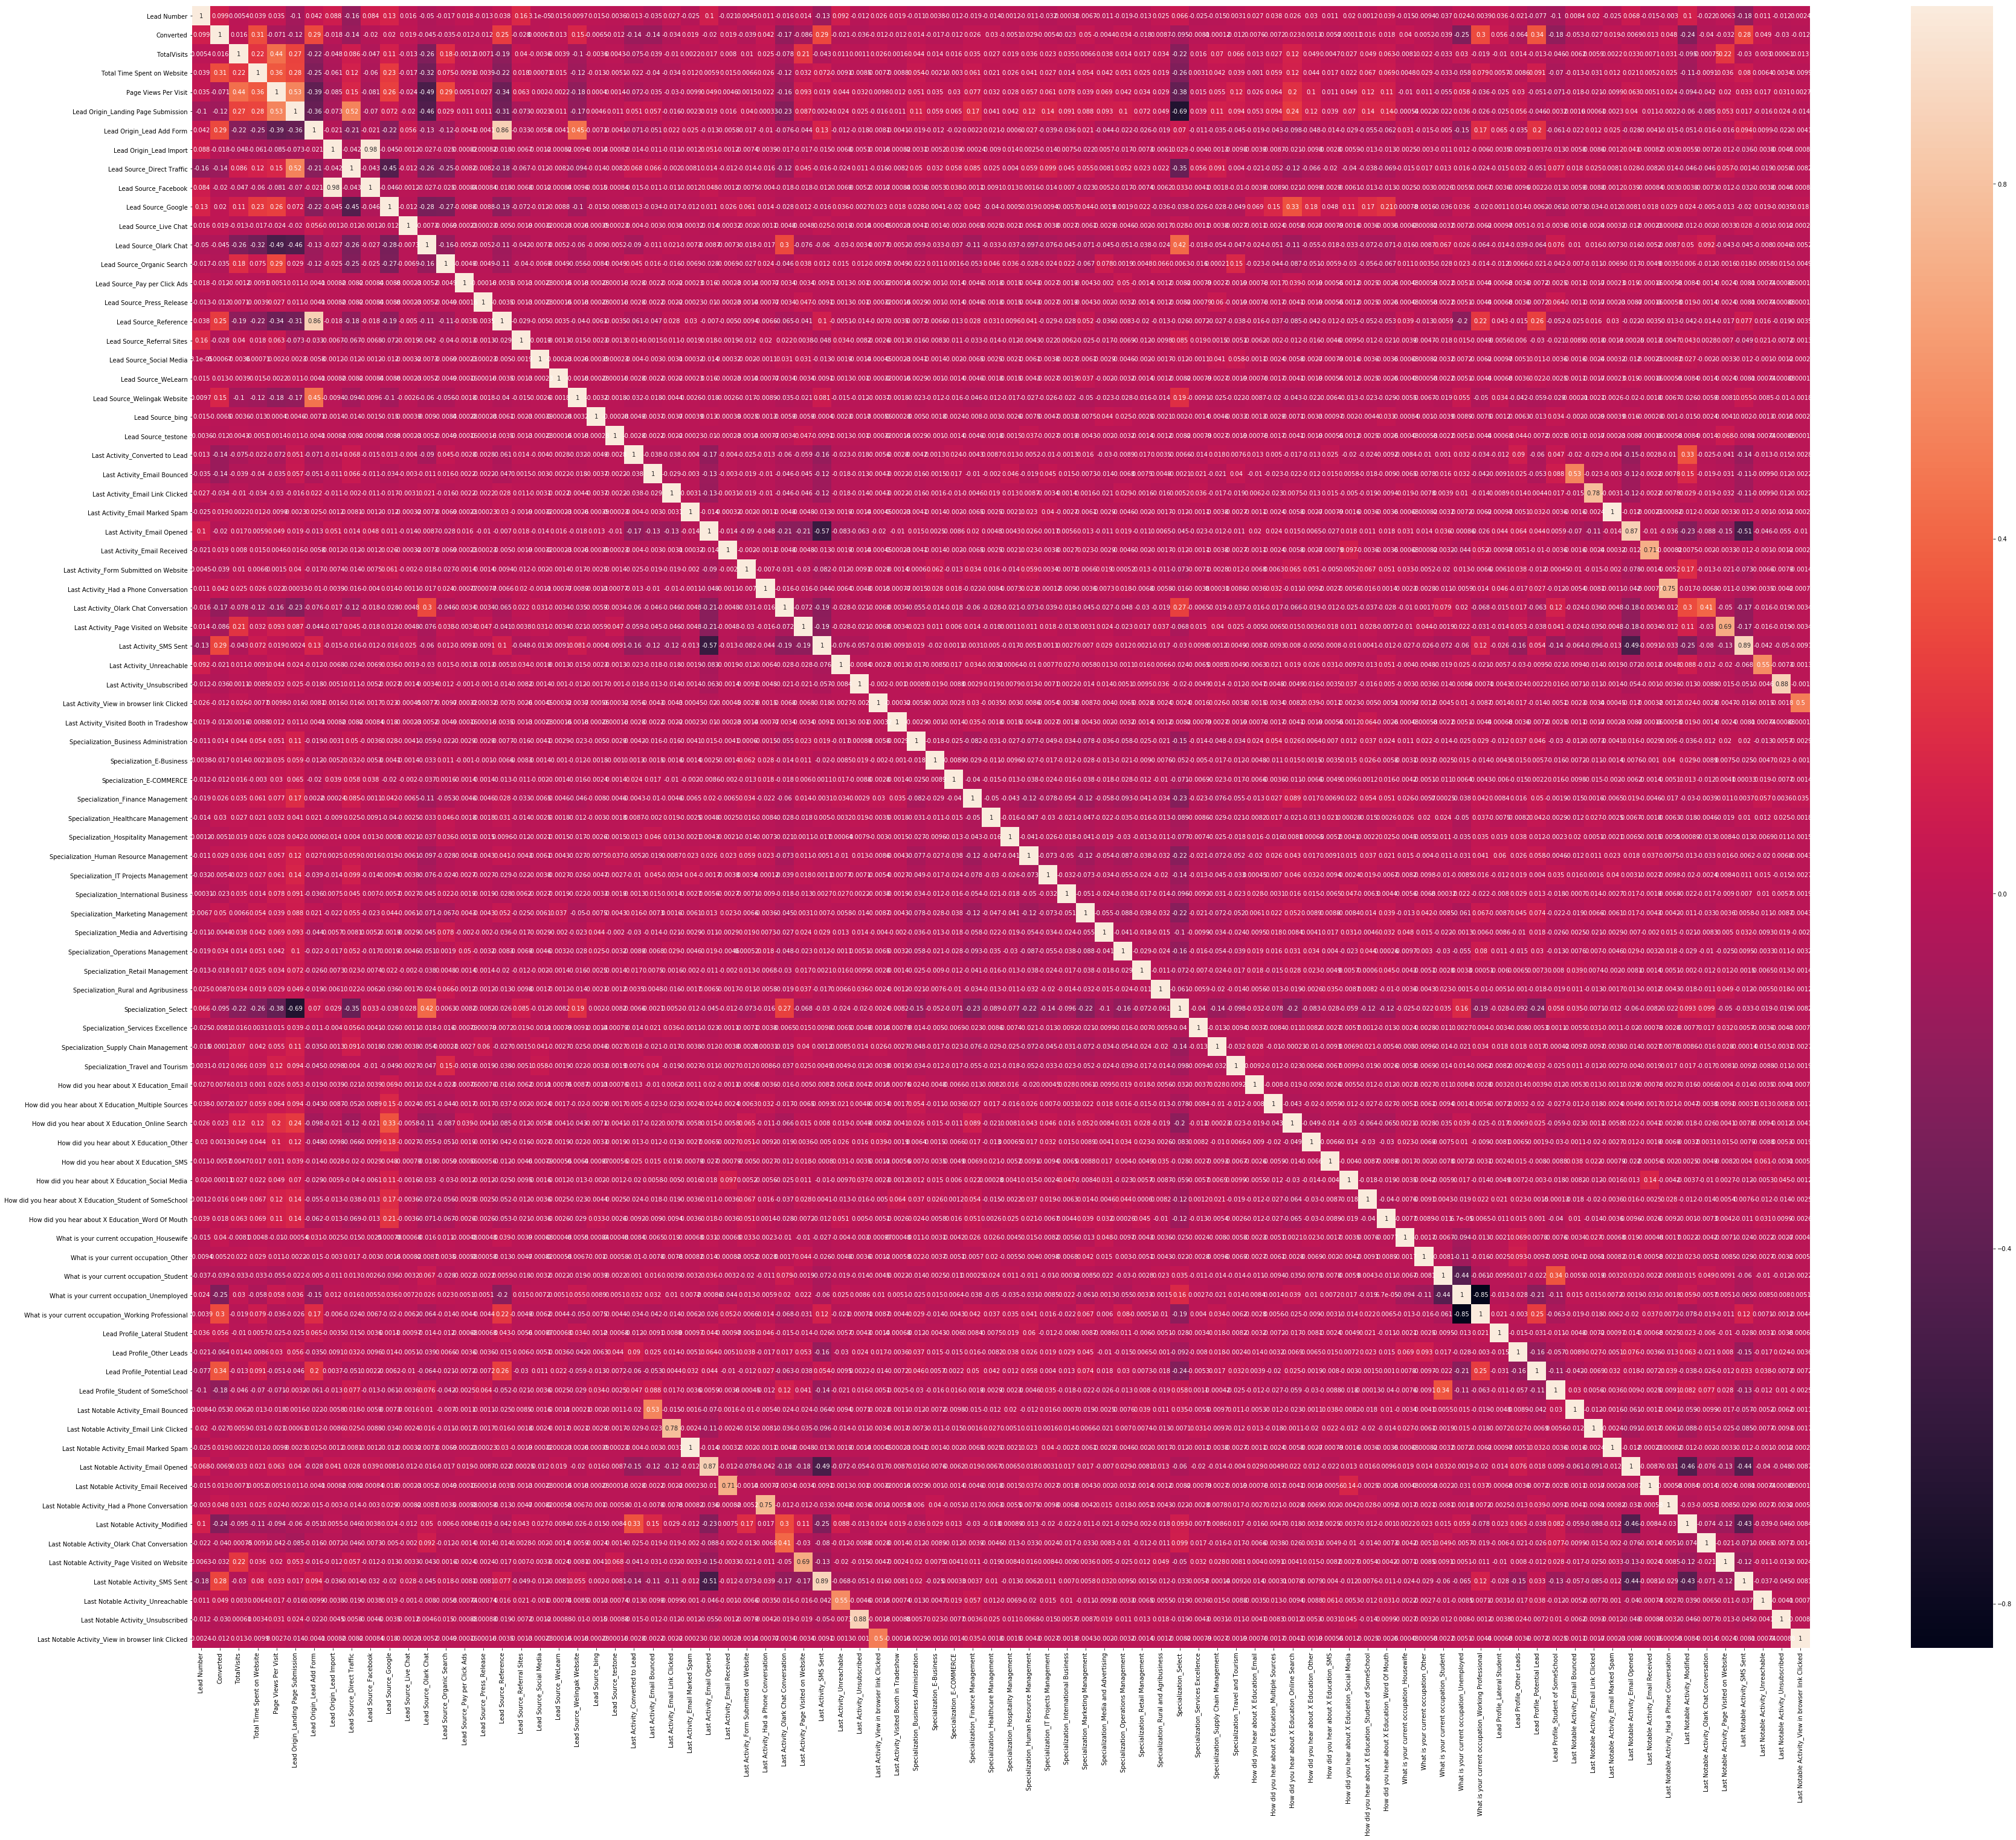

In [819]:
# Correlation Matrix
plt.figure(figsize = (60,50))
sns.heatmap(leads_df.corr(), annot = True)
plt.show()

### Step 7 : Model Building

Running first model

In [820]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4275
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 04 Oct 2019   Deviance:                          nan
Time:                        01:18:48   Pearson chi2:                 5.28e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     3.644e+15   1.03e+08   3.52e+07      0.000    3.64e+15    3.64e+15
TotalVisits                                               4.574e+15   5.64e+07    8.1e+07      0.000    4.57e+15    4.57e+15
Total Time Spent on Website                               1.778e+15   4.73e+06   3.76e+08      0.000    1.78e+15    1.78e+15
Page Views Per Visit                                      -4.03e+14   6.33e+06  -6.37e+07      0.000   -4.03e+14   -4.03e+14
Lead Origin_Landing Page Submission                      -2.708e+14   4.21e+06  -6.44e+07      0.000   -2.71e+14   -2.71e+14
Lead Origin_Lead Add Form                                 2.742e+13   4.85e+07   5.65e+05      0.000    2.74e+13    2.74e+13
Lead Origin_Lead Import                                  -1.228e+15    3.5e+07  -3.51e+07      0.000   -1.23e+15   -1.23e+15
Lead Source_Direct Traffic                               -5.561e+13   6.81e+07  -8.16e+05      0.000   -5.56e+13   -5.56e+13
Lead Source_Facebook                                     -1.228e+15    3.5e+07  -3.51e+07      0.000   -1.23e+15   -1.23e+15
Lead Source_Google                                         1.05e+14   6.81e+07   1.54e+06      0.000    1.05e+14    1.05e+14
Lead Source_Live Chat                                      -11.8390   5.26e-07  -2.25e+07      0.000     -11.839     -11.839
Lead Source_Olark Chat                                    7.532e+14    6.8e+07   1.11e+07      0.000    7.53e+14    7.53e+14
Lead Source_Organic Search                                 6.07e+13   6.82e+07    8.9e+05      0.000    6.07e+13    6.07e+13
Lead Source_Pay per Click Ads                            -4.644e+15   9.57e+07  -4.85e+07      0.000   -4.64e+15   -4.64e+15
Lead Source_Press_Release                                 2.058e+15   9.64e+07   2.13e+07      0.000    2.06e+15    2.06e+15
Lead Source_Reference                                     7.313e+14   4.77e+07   1.53e+07      0.000    7.31e+14    7.31e+14
Lead Source_Referral Sites                                7.172e+13   6.88e+07   1.04e+06      0.000    7.17e+13    7.17e+13
Lead Source_Social Media                                  8.101e+14   8.33e+07   9.73e+06      0.000     8.1e+14     8.1e+14
Lead Source_WeLearn                                       3.756e+15   9.57e+07   3.92e+07      0.000    3.76e+15    3.76e+15
Lead Source_Welingak Website                              4.993e+14   4.82e+07   1.04e+07      0.000    4.99e+14    4.99e+14
Lead Source_bing                                         -3.859e+15   8.31e+07  -4.65e+07      0.000   -3.86e+15   -3.86e+15
Lead Source_testone                                      -3.831e+15   9.58e+07     -4e+07      0.000   -3.83e+15   -3.83e+15
Last Activity_Converted to Lead      

### Step 8 : Feature Selection Using RFE

In [821]:
logreg = LogisticRegression()

In [822]:
# Apply RFE and select 20 variables
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [823]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False])

In [824]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 64),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 36),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 48),
 ('Last Activi

In [825]:
# Put all the columns selected by RFE in the variable cols
cols = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [826]:
# Select only the columns selected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_F

In [827]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4333
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1843.2
Date:                Fri, 04 Oct 2019   Deviance:                       3686.4
Time:                        01:18:52   Pearson chi2:                 4.51e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4932      0.285     -5.238      0.000      -2.052      -0.934
TotalVisits                                              9.1468      3.175      2.881      0.004       2.924      15.369
Total Time Spent on Website                              4.4078      0.197     22.333      0.000       4.021       4.795
Lead Origin_Lead Add Form                                1.2853      1.392      0.923      0.356      -1.443       4.014
Lead Source_Olark Chat                                   1.8353      0.138     13.271      0.000       1.564       2.106
Lead Source_Reference                                    2.0740      1.409      1.472      0.141      -0.687       4.835
Lead Source_Welingak Website                             4.3668      1.565      2.790      0.005       1.299       7.435
Last Activity_Email Bounced                             -1.6913      0.420     -4.026      0.000      -2.515      -0.868
Last Activity_Had a Phone Conversation                   0.9942      0.962      1.033      0.301      -0.892       2.880
Last Activity_Olark Chat Conversation                   -0.7614      0.207     -3.678      0.000      -1.167      -0.356
Last Activity_SMS Sent                                   0.9808      0.090     10.936      0.000       0.805       1.157
Last Activity_Unsubscribed                              -1.3839      0.651     -2.126      0.033      -2.660      -0.108
What is your current occupation_Housewife               23.2057    2.5e+04      0.001      0.999    -4.9e+04    4.91e+04
What is your current occupation_Unemployed              -0.8227      0.271     -3.036      0.002      -1.354      -0.292
What is your current occupation_Working Professional     1.4088      0.328      4.291      0.000       0.765       2.052
Lead Profile_Lateral Student                            22.9445   1.89e+04      0.001      0.999    -3.7e+04     3.7e+04
Lead Profile_Potential Lead                              1.4998      0.104     14.442      0.000       1.296       1.703
Lead Profile_Student of SomeSchool                      -2.9240      0.509     -5.747      0.000      -3.921      -1.927
Last Notable Activity_Had a Phone Conversation          22.2234   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
Last Notable Activity_Modified                          -0.7718      0.101     -7.622      0.000      -0.970      -0.573
Last Notable Activity_Unreachable                        2.4925      1.128      2.210      0.027       0.282       4.703
========================================================================================================================
"""

In [828]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8452    0.849129
6586    0.909149
3881    0.778674
7362    0.066142
8132    0.054067
7166    0.820579
2647    0.117759
1195    0.326346
7832    0.761948
6308    0.541250
dtype: float64

In [829]:
# reshaping the numpy array containig predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([84.91290531, 90.91491727, 77.86736897,  6.61416892,  5.40674491,
       82.05787286, 11.77589464, 32.63455561, 76.19479439, 54.12495272])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [830]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,84.912905,8452
1,1,90.914917,6586
2,1,77.867369,3881
3,0,6.614169,7362
4,0,5.406745,8132


Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [831]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,84.912905,8452,1
1,1,90.914917,6586,1
2,1,77.867369,3881,1
3,0,6.614169,7362,1
4,0,5.406745,8132,1


In [832]:
# Creating Confusion Metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[  36, 2206],
       [   1, 2111]], dtype=int64)

In [833]:
# Checking the overall accuracy
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc

0.4931097841065687

### Step 9 : Checking VIFs

In [834]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,104.19
4,Lead Source_Reference,79.32
5,Lead Source_Welingak Website,25.72
12,What is your current occupation_Unemployed,4.36
1,Total Time Spent on Website,2.36
7,Last Activity_Had a Phone Conversation,1.78
17,Last Notable Activity_Had a Phone Conversation,1.77
9,Last Activity_SMS Sent,1.74
13,What is your current occupation_Working Profes...,1.72
18,Last Notable Activity_Modified,1.71


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. So let's start by dropping that variables.

In [835]:
cols = cols.drop('Lead Origin_Lead Add Form', 1)
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [836]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4334
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1843.6
Date:                Fri, 04 Oct 2019   Deviance:                       3687.3
Time:                        01:18:54   Pearson chi2:                 4.51e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4908      0.285     -5.231      0.000      -2.049      -0.932
TotalVisits                                              9.0494      3.171      2.854      0.004       2.834      15.265
Total Time Spent on Website                              4.4037      0.197     22.339      0.000       4.017       4.790
Lead Source_Olark Chat                                   1.8327      0.138     13.271      0.000       1.562       2.103
Lead Source_Reference                                    3.3544      0.253     13.250      0.000       2.858       3.851
Lead Source_Welingak Website                             5.6486      0.725      7.794      0.000       4.228       7.069
Last Activity_Email Bounced                             -1.6943      0.420     -4.033      0.000      -2.518      -0.871
Last Activity_Had a Phone Conversation                   0.9929      0.962      1.032      0.302      -0.893       2.879
Last Activity_Olark Chat Conversation                   -0.7642      0.207     -3.693      0.000      -1.170      -0.359
Last Activity_SMS Sent                                   0.9791      0.090     10.920      0.000       0.803       1.155
Last Activity_Unsubscribed                              -1.3858      0.651     -2.129      0.033      -2.662      -0.110
What is your current occupation_Housewife               23.2051    2.5e+04      0.001      0.999    -4.9e+04    4.91e+04
What is your current occupation_Unemployed              -0.8211      0.271     -3.031      0.002      -1.352      -0.290
What is your current occupation_Working Professional     1.4084      0.328      4.290      0.000       0.765       2.052
Lead Profile_Lateral Student                            23.4292   1.81e+04      0.001      0.999   -3.54e+04    3.55e+04
Lead Profile_Potential Lead                              1.5039      0.104     14.489      0.000       1.300       1.707
Lead Profile_Student of SomeSchool                      -2.9236      0.509     -5.747      0.000      -3.921      -1.927
Last Notable Activity_Had a Phone Conversation          22.2236   2.76e+04      0.001      0.999   -5.41e+04    5.41e+04
Last Notable Activity_Modified                          -0.7706      0.101     -7.613      0.000      -0.969      -0.572
Last Notable Activity_Unreachable                        2.4910      1.128      2.209      0.027       0.281       4.701
========================================================================================================================
"""

In [837]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.36
1,Total Time Spent on Website,2.36
6,Last Activity_Had a Phone Conversation,1.78
16,Last Notable Activity_Had a Phone Conversation,1.77
8,Last Activity_SMS Sent,1.74
12,What is your current occupation_Working Profes...,1.72
17,Last Notable Activity_Modified,1.71
0,TotalVisits,1.64
14,Lead Profile_Potential Lead,1.53
2,Lead Source_Olark Chat,1.49


In [838]:
#drop column having high p value 'What is your current occupation_Housewife'
cols = cols.drop('What is your current occupation_Housewife', 1)

In [839]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4335
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1847.1
Date:                Fri, 04 Oct 2019   Deviance:                       3694.2
Time:                        01:18:55   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3304      0.279     -4.770      0.000      -1.877      -0.784
TotalVisits                                              8.9096      3.167      2.814      0.005       2.703      15.116
Total Time Spent on Website                              4.3981      0.197     22.329      0.000       4.012       4.784
Lead Source_Olark Chat                                   1.8245      0.138     13.226      0.000       1.554       2.095
Lead Source_Reference                                    3.3596      0.253     13.291      0.000       2.864       3.855
Lead Source_Welingak Website                             5.6425      0.725      7.786      0.000       4.222       7.063
Last Activity_Email Bounced                             -1.7004      0.420     -4.051      0.000      -2.523      -0.878
Last Activity_Had a Phone Conversation                   0.9891      0.962      1.028      0.304      -0.896       2.874
Last Activity_Olark Chat Conversation                   -0.7704      0.207     -3.723      0.000      -1.176      -0.365
Last Activity_SMS Sent                                   0.9743      0.090     10.872      0.000       0.799       1.150
Last Activity_Unsubscribed                              -1.3862      0.650     -2.132      0.033      -2.661      -0.112
What is your current occupation_Unemployed              -0.9735      0.266     -3.663      0.000      -1.494      -0.453
What is your current occupation_Working Professional     1.2553      0.324      3.877      0.000       0.621       1.890
Lead Profile_Lateral Student                            23.4237   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
Lead Profile_Potential Lead                              1.4981      0.104     14.446      0.000       1.295       1.701
Lead Profile_Student of SomeSchool                      -2.9908      0.508     -5.885      0.000      -3.987      -1.995
Last Notable Activity_Had a Phone Conversation          22.2273   2.76e+04      0.001      0.999   -5.41e+04    5.41e+04
Last Notable Activity_Modified                          -0.7697      0.101     -7.616      0.000      -0.968      -0.572
Last Notable Activity_Unreachable                        2.4884      1.128      2.207      0.027       0.279       4.698
========================================================================================================================
"""

In [840]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.34
1,Total Time Spent on Website,2.35
6,Last Activity_Had a Phone Conversation,1.78
15,Last Notable Activity_Had a Phone Conversation,1.77
8,Last Activity_SMS Sent,1.74
11,What is your current occupation_Working Profes...,1.72
16,Last Notable Activity_Modified,1.71
0,TotalVisits,1.64
13,Lead Profile_Potential Lead,1.53
2,Lead Source_Olark Chat,1.49


In [841]:
#drop column having high p value 'Lead Profile_Lateral Student'
cols = cols.drop('Lead Profile_Lateral Student', 1)

In [842]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4336
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1854.0
Date:                Fri, 04 Oct 2019   Deviance:                       3708.1
Time:                        01:18:56   Pearson chi2:                 4.55e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3282      0.279     -4.760      0.000      -1.875      -0.781
TotalVisits                                              8.9906      3.159      2.846      0.004       2.799      15.182
Total Time Spent on Website                              4.3980      0.196     22.399      0.000       4.013       4.783
Lead Source_Olark Chat                                   1.8213      0.138     13.236      0.000       1.552       2.091
Lead Source_Reference                                    3.4156      0.253     13.499      0.000       2.920       3.911
Lead Source_Welingak Website                             5.6895      0.725      7.852      0.000       4.269       7.110
Last Activity_Email Bounced                             -1.7093      0.420     -4.074      0.000      -2.532      -0.887
Last Activity_Had a Phone Conversation                   1.1423      0.906      1.261      0.207      -0.633       2.917
Last Activity_Olark Chat Conversation                   -0.7787      0.207     -3.766      0.000      -1.184      -0.373
Last Activity_SMS Sent                                   0.9610      0.089     10.742      0.000       0.786       1.136
Last Activity_Unsubscribed                              -1.3963      0.650     -2.148      0.032      -2.670      -0.122
What is your current occupation_Unemployed              -0.9632      0.266     -3.622      0.000      -1.484      -0.442
What is your current occupation_Working Professional     1.2686      0.324      3.918      0.000       0.634       1.903
Lead Profile_Potential Lead                              1.4856      0.104     14.341      0.000       1.283       1.689
Lead Profile_Student of SomeSchool                      -3.0008      0.509     -5.896      0.000      -3.998      -2.003
Last Notable Activity_Had a Phone Conversation          21.0617   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
Last Notable Activity_Modified                          -0.7693      0.101     -7.632      0.000      -0.967      -0.572
Last Notable Activity_Unreachable                        2.4755      1.127      2.196      0.028       0.266       4.685
========================================================================================================================
"""

In [843]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.34
1,Total Time Spent on Website,2.35
6,Last Activity_Had a Phone Conversation,1.77
14,Last Notable Activity_Had a Phone Conversation,1.76
8,Last Activity_SMS Sent,1.74
11,What is your current occupation_Working Profes...,1.72
15,Last Notable Activity_Modified,1.71
0,TotalVisits,1.64
12,Lead Profile_Potential Lead,1.53
2,Lead Source_Olark Chat,1.49


In [844]:
#drop column havign high p value (here 'Last Notable Activity_Had a Phone Conversation')
cols = cols.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [845]:
# Re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4337
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1855.1
Date:                Fri, 04 Oct 2019   Deviance:                       3710.2
Time:                        01:18:56   Pearson chi2:                 4.55e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3275      0.279     -4.757      0.000      -1.874      -0.781
TotalVisits                                              9.0763      3.155      2.877      0.004       2.892      15.260
Total Time Spent on Website                              4.3944      0.196     22.385      0.000       4.010       4.779
Lead Source_Olark Chat                                   1.8216      0.138     13.238      0.000       1.552       2.091
Lead Source_Reference                                    3.4121      0.253     13.485      0.000       2.916       3.908
Lead Source_Welingak Website                             5.6909      0.725      7.854      0.000       4.271       7.111
Last Activity_Email Bounced                             -1.7067      0.420     -4.068      0.000      -2.529      -0.884
Last Activity_Had a Phone Conversation                   1.7628      0.779      2.264      0.024       0.237       3.289
Last Activity_Olark Chat Conversation                   -0.7748      0.207     -3.747      0.000      -1.180      -0.369
Last Activity_SMS Sent                                   0.9604      0.089     10.735      0.000       0.785       1.136
Last Activity_Unsubscribed                              -1.3975      0.650     -2.149      0.032      -2.672      -0.123
What is your current occupation_Unemployed              -0.9631      0.266     -3.621      0.000      -1.484      -0.442
What is your current occupation_Working Professional     1.2683      0.324      3.917      0.000       0.634       1.903
Lead Profile_Potential Lead                              1.4895      0.104     14.391      0.000       1.287       1.692
Lead Profile_Student of SomeSchool                      -3.0002      0.509     -5.895      0.000      -3.998      -2.003
Last Notable Activity_Modified                          -0.7764      0.101     -7.713      0.000      -0.974      -0.579
Last Notable Activity_Unreachable                        2.4728      1.127      2.194      0.028       0.263       4.682
========================================================================================================================
"""

In [846]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.34
1,Total Time Spent on Website,2.35
8,Last Activity_SMS Sent,1.74
11,What is your current occupation_Working Profes...,1.72
14,Last Notable Activity_Modified,1.70
0,TotalVisits,1.64
12,Lead Profile_Potential Lead,1.53
2,Lead Source_Olark Chat,1.49
3,Lead Source_Reference,1.37
7,Last Activity_Olark Chat Conversation,1.34


Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

In [847]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.8484598 , 0.90806247, 0.779226  , 0.06632784, 0.05506803,
       0.82345447, 0.11708883, 0.32692232, 0.7621614 , 0.54385725])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [848]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.848460,8452
1,1,0.908062,6586
2,1,0.779226,3881
3,0,0.066328,7362
4,0,0.055068,8132


In [849]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.848460,8452,1
1,1,0.908062,6586,1
2,1,0.779226,3881,1
3,0,0.066328,7362,0
4,0,0.055068,8132,0


In [850]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion1

array([[1847,  395],
       [ 466, 1646]], dtype=int64)

In [851]:
# Check the overall accuracy.
acc1 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
acc1

0.8022508038585209

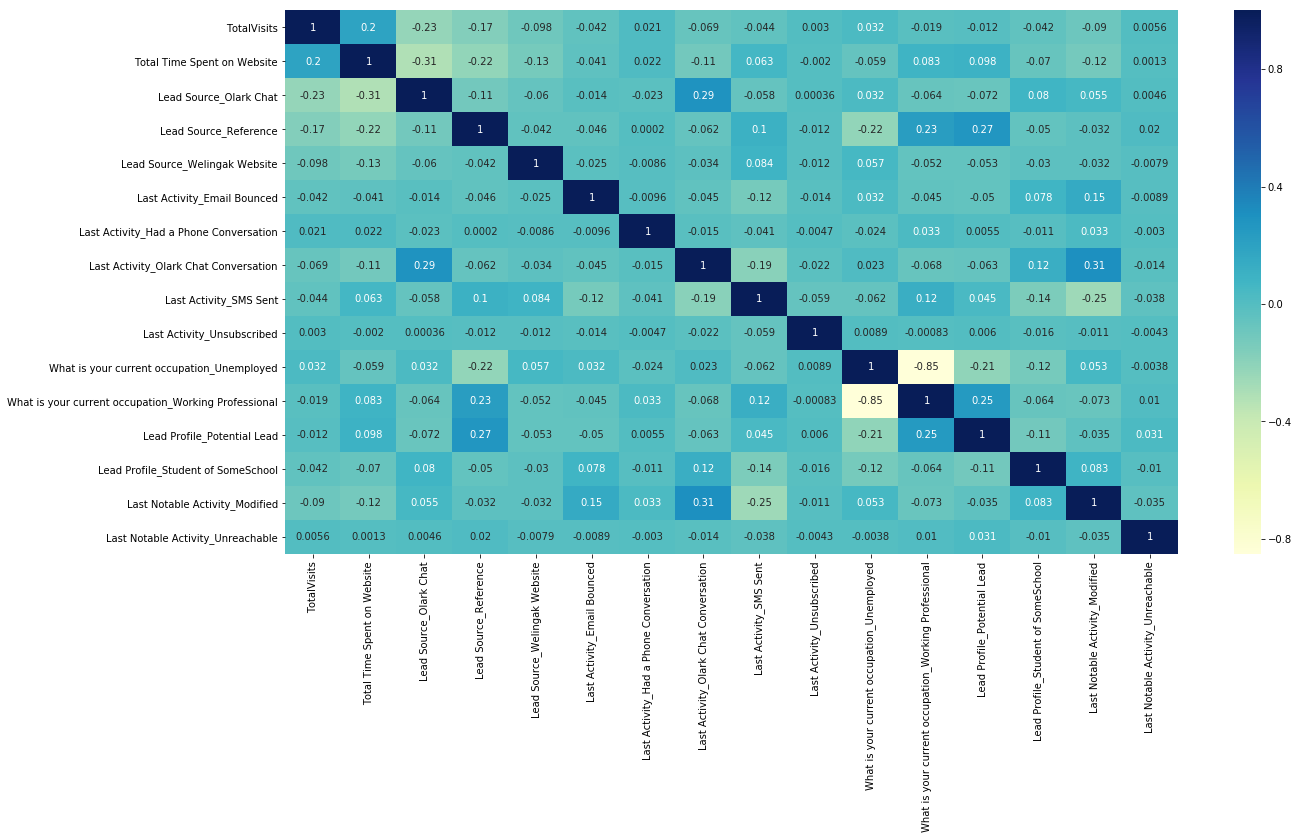

In [852]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="YlGnBu")
plt.show()

##### Our latest model have the following features:
1. <font color = blue>All variables have p-value < 0.05. </font>
2. <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
3. <font color = blue>The overall accuracy of 0.8022 at a probability threshold of 0.05 is also very acceptable.</font>
    
    
### So we need not drop any more variables and we can proceed with making predictions using this model only

### Step 10 : Calculating Metrics beyond Accuracy

In [853]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [854]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7793560606060606

In [855]:
# Calculate specificity
TN / float(TN+FP)

0.8238180196253345

In [856]:
# Calculate false postive rate - predicting churn when customer does not have churned
fr = FP/ float(TN+FP)
fr

0.17618198037466548

In [857]:
# positive predictive value 
ppv = TP / float(TP+FP)
ppv

0.8064674179323861

In [858]:
# Negative predictive value
npv = TN / float(TN+ FN)
npv

0.798530047557285

### Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [859]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [860]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

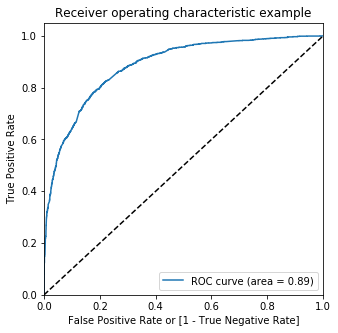

In [862]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calculating Area under the curve

In [863]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [864]:
auc = auc_val(fpr,tpr)
auc

0.8850417013015939

### Step 12 : Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [865]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.848460,8452,1,1,1,1,1,1,1,1,1,1,0
1,1,0.908062,6586,1,1,1,1,1,1,1,1,1,1,1
2,1,0.779226,3881,1,1,1,1,1,1,1,1,1,0,0
3,0,0.066328,7362,0,1,0,0,0,0,0,0,0,0,0
4,0,0.055068,8132,0,1,0,0,0,0,0,0,0,0,0


In [866]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.485071,1.000000,0.000000
0.1,0.1,0.610243,0.983902,0.258252
0.2,0.2,0.735645,0.953125,0.530776
0.3,0.3,0.779972,0.905303,0.661909
0.4,0.4,0.801562,0.824811,0.779661
0.5,0.5,0.802251,0.779356,0.823818
0.6,0.6,0.794901,0.720644,0.864853
0.7,0.7,0.767800,0.608902,0.917484
0.8,0.8,0.733119,0.493845,0.958519
0.9,0.9,0.669040,0.330966,0.987511


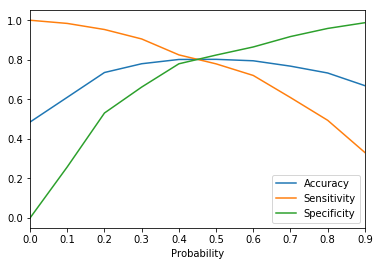

In [867]:
# Plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the curve above, 0.44 is the optimum point to take it as a cutoff probability

In [868]:

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( 
    lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.848460,8452,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.908062,6586,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.779226,3881,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.066328,7362,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.055068,8132,0,1,0,0,0,0,0,0,0,0,0,0


In [869]:
# Check the overall accuracy.
acc2 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
acc2

0.8001837390904915

In [870]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[1787,  455],
       [ 415, 1697]], dtype=int64)

In [871]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [872]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8035037878787878

In [873]:
# specificity
TN / float(TN+FP)

0.7970561998215878

In [874]:
# false postive rate - predicting converion when customer does not have converted
fpr1 = FP/ float(TN+FP)
fpr1 

0.20294380017841213

In [875]:
# Positive predictive value 
ppv = TP / float(TP+FP)
ppv

0.7885687732342007

In [876]:
# Negative predictive value
npv = TN / float(TN+ FN)
npv

0.8115349682107176

### Step 13 : Precision and Recall

In [877]:
# Precision = TP / TP + FP

precision = confusion2[1,1]/(confusion2[1,1]+confusion2[0,1])
precision

0.7885687732342007

In [878]:
# Recall = TP / TP + FN

recall = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
recall

0.8035037878787878

In [879]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8064674179323861

In [880]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7793560606060606

#### Precision and recall tradeoff

In [881]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      1
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 4324    1
 4325    0
 4326    0
 4327    1
 4328    0
 4329    1
 4330    1
 4331    0
 4332    0
 4333    0
 4334    1
 4335    0
 4336    0
 4337    1
 4338    0
 4339    0
 4340    1
 4341    0
 4342    0
 4343    0
 4344    0
 4345    0
 4346    1
 4347    0
 4348    0
 4349    0
 4350    1
 4351    0
 4352    0
 4353    1
 Name: Converted, Length: 4354, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
 5       1
 6       0
 7       0
 8       1
 9       1
 10      0
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

In [882]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                          y_train_pred_final.Conversion_Prob)

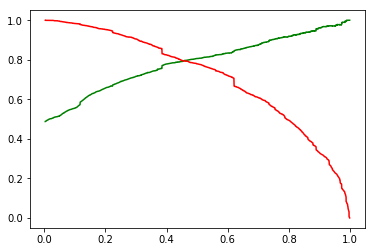

In [883]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here, threshold value is around 4.4 which is equal to the optimum point of cut of probability. So we are keeping this model

### Step 14 : Making Predictions on Test Set

Using the scaler function from the train dataset to transfor the test dataset

In [884]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2043,0.007968,0.683979,0.285714,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8169,0.015936,0.073063,0.571429,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4636,0.007968,0.099032,0.285714,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6793,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5080,0.011952,0.594190,0.428571,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [885]:
X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2043,0.007968,0.683979,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8169,0.015936,0.073063,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4636,0.007968,0.099032,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6793,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,0.011952,0.594190,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [886]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [887]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

2043    0.989102
8169    0.296399
4636    0.143916
6793    0.384849
5080    0.605617
6159    0.107885
482     0.862295
7805    0.903326
1284    0.563889
2809    0.873462
dtype: float64

In [888]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2043,0.989102
8169,0.296399
4636,0.143916
6793,0.384849
5080,0.605617


In [889]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [890]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [891]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [892]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,LeadID,0
0,1,2043,0.989102
1,0,8169,0.296399
2,0,4636,0.143916
3,0,6793,0.384849
4,1,5080,0.605617


In [893]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [894]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,2043,1,0.989102
1,8169,0,0.296399
2,4636,0,0.143916
3,6793,0,0.384849
4,5080,1,0.605617


In [895]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Final_Predicted
0,2043,1,0.989102,1
1,8169,0,0.296399,0
2,4636,0,0.143916,0
3,6793,0,0.384849,0
4,5080,1,0.605617,1


In [896]:
# check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8065380493033226

In [897]:
# Confusion Metrics
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion_test

array([[794, 190],
       [171, 711]], dtype=int64)

In [898]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [899]:
# sensitivity
TP / float(TP+FN)

0.8061224489795918

In [900]:
# specificity
TN / float(TN+FP)

0.806910569105691

In [901]:
# false postive rate
fpr_test = FP/ float(TN+FP)
fpr_test

0.19308943089430894

In [902]:
# Positive predictive value 
ppv_test = TP / float(TP+FP)
ppv_test

0.7891231964483907

In [903]:
# Negative predictive value
npv_test = TN / float(TN+ FN)
npv_test

0.8227979274611399

In [904]:
# precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7891231964483907

In [905]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8061224489795918

In [906]:
y_pred_final.Converted, y_pred_final.Final_Predicted

(0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      1
 15      0
 16      1
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      1
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 1836    0
 1837    1
 1838    1
 1839    1
 1840    1
 1841    0
 1842    1
 1843    1
 1844    0
 1845    0
 1846    1
 1847    0
 1848    0
 1849    0
 1850    0
 1851    0
 1852    1
 1853    1
 1854    0
 1855    1
 1856    0
 1857    0
 1858    1
 1859    0
 1860    1
 1861    0
 1862    1
 1863    0
 1864    1
 1865    1
 Name: Converted, Length: 1866, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       1
 8       1
 9       1
 10      1
 11      0
 12      1
 13      1
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      1
 24      0
 25      

In [908]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

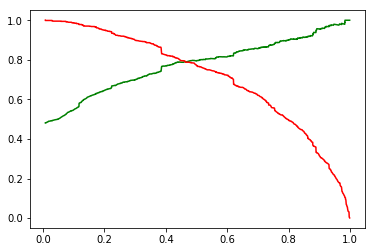

In [909]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Plotting ROC Curve

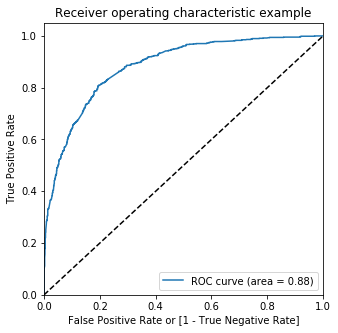

In [910]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

#### Calculating the Area Under the Curve

In [911]:
auc_test = auc_val(fpr,tpr)
auc_test

0.8850417013015939

### Step 15 : Calculating Lead Score for the entire dataset

#### Lead Score = 100 * ConversionProbability

This needs to be calculated for all the leads from the original dataset (train + test

In [912]:
# Selecting the test dataset along with the Conversion Probability and 
#final predicted value for 'Converted'

leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,Final_Predicted
0,2043,1,0.989102,1
1,8169,0,0.296399,0
2,4636,0,0.143916,0
3,6793,0,0.384849,0
4,5080,1,0.605617,1


In [913]:
# Selecting the train dataset along with the Conversion Probability and 
#final predicted value for 'Conversion'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.848460,8452,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.908062,6586,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.779226,3881,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.066328,7362,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.055068,8132,0,1,0,0,0,0,0,0,0,0,0,0


In [915]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','Final_Predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,Final_Predicted
0,8452,1,0.848460,1
1,6586,1,0.908062,1
2,3881,1,0.779226,1
3,7362,0,0.066328,0
4,8132,0,0.055068,0


#### Concatenating the train and the test dataset with the Conversion Probabilities

In [916]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,Final_Predicted
0,8452,1,0.848460,1
1,6586,1,0.908062,1
2,3881,1,0.779226,1
3,7362,0,0.066328,0
4,8132,0,0.055068,0


In [917]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(4354, 4)
(1866, 4)
(6220, 4)


In [918]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

6220

In [919]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,8452,1,0.848460,1,85
1,6586,1,0.908062,1,91
2,3881,1,0.779226,1,78
3,7362,0,0.066328,0,7
4,8132,0,0.055068,0,6


In [920]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [921]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,Final_Predicted,Lead_Score
LeadID,,,,
0,0,0.223489,0,22
1,0,0.308695,0,31
2,1,0.960736,1,96
3,0,0.080099,0,8
4,1,0.442059,1,44


In [924]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [925]:
#Concatenating the 2 dataframes based on index.

#This is done so that Lead Score is associated to the Lead Number of each Lead. 
#This will help in quick identification of the lead.

leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,Final_Predicted,Lead_Score
0,660737,0,0.223489,0,22
1,660728,0,0.308695,0,31
2,660727,1,0.960736,1,96
3,660719,0,0.080099,0,8
4,660681,1,0.442059,1,44
6,660673,1,0.841133,1,84
11,660570,1,0.644784,1,64
13,660558,0,0.144176,0,14
14,660553,0,0.046051,0,5
15,660547,1,0.470950,1,47


In [926]:
leads_with_score.shape

(6220, 5)

In [927]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
Final_Predicted,0,0.0
Conversion_Prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


### Step 16 :  Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [928]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

TotalVisits                                             9.08
Total Time Spent on Website                             4.39
Lead Source_Olark Chat                                  1.82
Lead Source_Reference                                   3.41
Lead Source_Welingak Website                            5.69
Last Activity_Email Bounced                            -1.71
Last Activity_Had a Phone Conversation                  1.76
Last Activity_Olark Chat Conversation                  -0.77
Last Activity_SMS Sent                                  0.96
Last Activity_Unsubscribed                             -1.40
What is your current occupation_Unemployed             -0.96
What is your current occupation_Working Professional    1.27
Lead Profile_Potential Lead                             1.49
Lead Profile_Student of SomeSchool                     -3.00
Last Notable Activity_Modified                         -0.78
Last Notable Activity_Unreachable                       2.47
dtype: float64

##### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [929]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                            100.00
Total Time Spent on Website                             48.42
Lead Source_Olark Chat                                  20.07
Lead Source_Reference                                   37.59
Lead Source_Welingak Website                            62.70
Last Activity_Email Bounced                            -18.80
Last Activity_Had a Phone Conversation                  19.42
Last Activity_Olark Chat Conversation                   -8.54
Last Activity_SMS Sent                                  10.58
Last Activity_Unsubscribed                             -15.40
What is your current occupation_Unemployed             -10.61
What is your current occupation_Working Professional    13.97
Lead Profile_Potential Lead                             16.41
Lead Profile_Student of SomeSchool                     -33.06
Last Notable Activity_Modified                          -8.55
Last Notable Activity_Unreachable                       27.24
dtype: f

In [930]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                             13
Total Time Spent on Website                              5
Lead Source_Olark Chat                                   9
Lead Source_Reference                                   10
Lead Source_Welingak Website                            14
Last Activity_Email Bounced                              7
Last Activity_Had a Phone Conversation                   8
Last Activity_Olark Chat Conversation                   11
Last Activity_SMS Sent                                  12
Last Activity_Unsubscribed                               6
What is your current occupation_Unemployed               2
What is your current occupation_Working Professional    15
Lead Profile_Potential Lead                              3
Lead Profile_Student of SomeSchool                       1
Last Notable Activity_Modified                           4
Last Notable Activity_Unreachable                        0
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

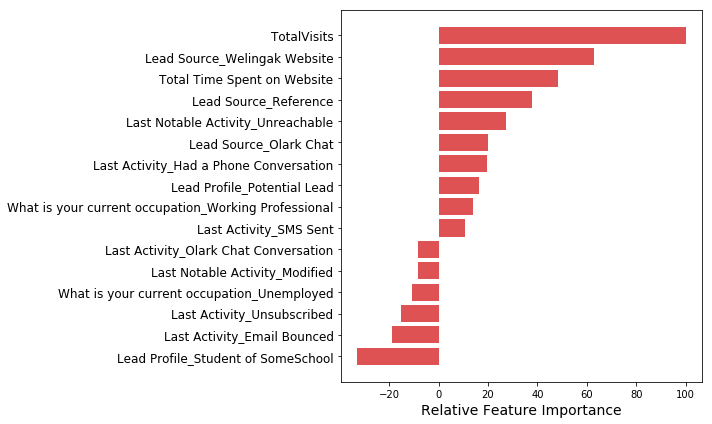

In [932]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

***Selecting Top 3 features which contribute most towards the probability of a lead getting converted***

In [933]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
0,TotalVisits,100.00
4,Lead Source_Welingak Website,62.70
1,Total Time Spent on Website,48.42
